## Installing Packages

In [1]:
! pip uninstall opencv-python -y
! pip uninstall opencv-contrib-python -y
! pip install opencv-python==3.4.11.45
! pip install opencv-contrib-python==3.4.11.45
! pip install tqdm

Found existing installation: opencv-python 3.4.11.45

ERROR: Exception:
Traceback (most recent call last):
  File "E:\MS DS\python\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "E:\MS DS\python\lib\site-packages\pip\_internal\commands\uninstall.py", line 93, in run
    uninstall_pathset.commit()
  File "E:\MS DS\python\lib\site-packages\pip\_internal\req\req_uninstall.py", line 450, in commit
    self._moved_paths.commit()
  File "E:\MS DS\python\lib\site-packages\pip\_internal\req\req_uninstall.py", line 290, in commit
    save_dir.cleanup()
  File "E:\MS DS\python\lib\site-packages\pip\_internal\utils\temp_dir.py", line 199, in cleanup
    rmtree(ensure_text(self._path))
  File "E:\MS DS\python\lib\site-packages\pip\_vendor\retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "E:\MS DS\python\lib\site-packages\pip\_vendor\retrying.py", line 212, in call
    raise attempt.get()
  File "E:\MS DS\python\lib\site-packages\pip


Uninstalling opencv-python-3.4.11.45:
  Successfully uninstalled opencv-python-3.4.11.45
Found existing installation: opencv-contrib-python 3.4.11.45
Uninstalling opencv-contrib-python-3.4.11.45:
  Successfully uninstalled opencv-contrib-python-3.4.11.45
  Using cached opencv_python-3.4.11.45-cp38-cp38-win_amd64.whl (31.5 MB)
  Using cached opencv_contrib_python-3.4.11.45-cp38-cp38-win_amd64.whl (37.4 MB)


## Installing relevant libraries

In [2]:
import argparse
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder
from skimage import feature
from skimage import exposure
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time
from skimage.feature import hog
from skimage.io import imread
import joblib,glob,os,cv2




## Loading the training data

In [3]:
#LOAD THE TRAINING DATA
Categ=['pos','neg']
traindata_=[] #input array
trainlabel=[] #output array
datadirectory='Downloads/Train' 
#path which contains all the categories of images
for i in Categ:
    
    
    path=os.path.join(datadirectory,i)
    for image in os.listdir(path):
        t_image=imread(os.path.join(path,image))
        t_image=resize(t_image,(64,128))
        
  #append computed HOGs in train data
        traindata_.append(t_image)
        
        trainlabel.append(Categ.index(i))
        
   

## Loading testing data

In [4]:
#LOAD TEST DATA
Categ=['pos','neg']
testdata_=[] #input array

testlabel=[] #output array
datadirectory='Downloads/Test' 
#path which contains all the categories of images
for i in Categ:
    
   
    path=os.path.join(datadirectory,i)
    for img in os.listdir(path):
        t_image=imread(os.path.join(path,img))
        t_image=resize(t_image,(64,128))
        
  #append computed HOGs in train data
        testdata_.append(t_image)
        
        testlabel.append(Categ.index(i))
        
    


## Hog function

In [5]:
#FUNCTION TO COMPUTE HOG
def HOG_func(image):
    (H_vector, hog_Image) = feature.hog(image, orientations = 9,
                                pixels_per_cell  = (8, 8), cells_per_block  = (3, 3), transform_sqrt=True,
                                block_norm  = 'L1' , visualize=True)
    return (H_vector, hog_Image)
#APPLY HOG ON TRAINING
traindata=[]
for i in trainlabel:
 
    (hog, hogimage) = HOG_func(traindata_[i])
    traindata.append(hog)



## Random forest classifier

In [15]:
#TRAIN RANDDOM FOREST CLASSIFIER
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
randomforest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
randomforest.fit(traindata, trainlabel);

## SVM classifier

In [16]:
#TRAIN SVM MODEL
from sklearn.svm import LinearSVC

# load linear SVM
SVCmod = LinearSVC(max_iter=3000)
SVCmod.fit(traindata, trainlabel)
print(" training done")


 training done


## Applying HOG on test data

In [17]:
#APPLY HOG ON TEST DATA
testdata=[]
for i in testlabel:
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
    (hog, hogimage) = HOG_func(testdata_[i])
  #append computed HOGs in train data
    testdata.append(hog)
#get train labels


## Testing the models and generating classification reports

In [18]:
#TEST THE MODELS

# Create predictions(SVM)
pred_labels = SVCmod.predict(testdata)
print("Prediction is done")
#CLASSIFICATION FOR MODELS
from sklearn.metrics import classification_report
print(classification_report(testlabel, pred_labels))

Prediction is done
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1132
           1       1.00      1.00      1.00       453

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585



In [19]:
# Create predictions(RANDOM FOREST)
pred_labelsRF = randomforest.predict(testdata)
print("PredictionRF is done")
print(classification_report(testlabel, pred_labelsRF))

PredictionRF is done
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1132
           1       0.00      0.00      0.00       453

    accuracy                           0.71      1585
   macro avg       0.36      0.50      0.42      1585
weighted avg       0.51      0.71      0.60      1585



E:\MS DS\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ## Visualizing the images

Actual Label =
0
Predicted Label =
1
Actual Label rf =
0
Predicted rf =
1


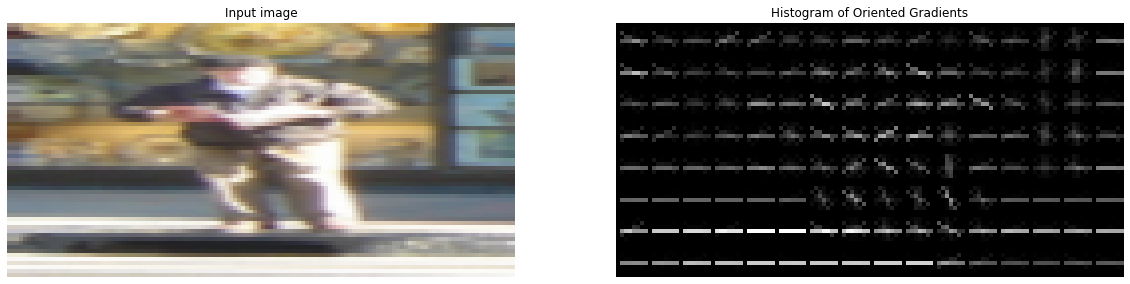

In [20]:
#VISUALIZATION 
i = 99
#get image
image = testdata_[i]

#compute hog feature vector for above image
(hog, hogimage) = HOG_func(image)
obtained_label = SVCmod.predict([hog])
obtained_labelrf = randomforest.predict([hog])

#comparison
print("Actual Label =")
print(testlabel[i])
print("Predicted Label =")
print(obtained_label[0])
print("Actual Label rf =")
print(testlabel[i])
print("Predicted rf =")
print(obtained_label[0])
#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(hogimage,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Actual Label svm =
0
Predicted Labelsvm =
0
Actual Label rf =
0
Predicted rf =
0


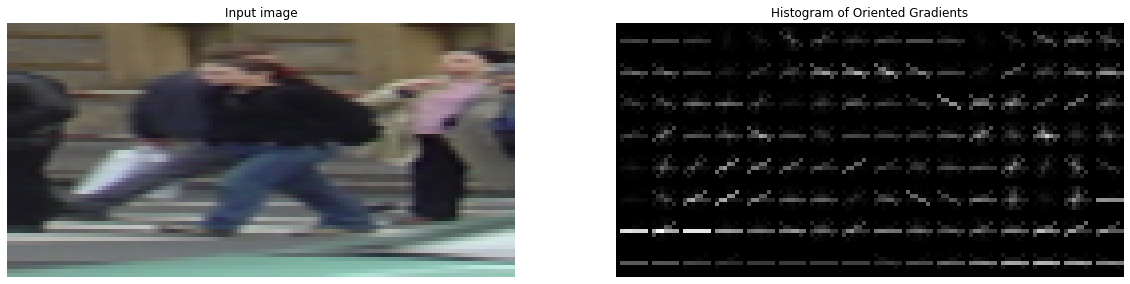

In [21]:
i = 103
#get image
image = testdata_[i]

#compute hog feature vector for above image
(hog, hogimage) = HOG_func(image)
obtained_label = SVCmod.predict([hog])
obtained_labelrf = randomforest.predict([hog])

#comparison
print("Actual Label svm =")
print(testlabel[i])
print("Predicted Labelsvm =")
print(obtained_label[0])
#comparison
print("Actual Label rf =")
print(testlabel[i])
print("Predicted rf =")
print(obtained_label[0])

#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(hogimage,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

###### References:
           https://github.com/RashadGarayev/PersonDetection/blob/master/training_SVM.py
           https://debuggercafe.com/image-recognition-using-histogram-of-oriented-gradients-hog-descriptor/
           https://github.com/visionatseecs/opencv-starter/blob/main/07.ipynb
           https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01